In [13]:
'''
diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. 
It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. 
The target variable Diabetes_binary has 2 classes: 
    0 is for no diabetes
    1 is for prediabetes or diabetes. 
This dataset has 21 feature variables and is balanced.
'''
import pandas as pd

df2 = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df2

df2.drop_duplicates(inplace = True)
df2.shape

(69057, 22)

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df2.drop('Diabetes_binary', axis=1)
y = df2['Diabetes_binary']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)



Accuracy: 0.7421083116130901
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.74      6950
         1.0       0.73      0.77      0.75      6862

    accuracy                           0.74     13812
   macro avg       0.74      0.74      0.74     13812
weighted avg       0.74      0.74      0.74     13812



In [28]:
# KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


k_value = 5 
model = KNeighborsClassifier(n_neighbors=k_value)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.7129217059197963
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71      7141
         1.0       0.70      0.74      0.72      6998

    accuracy                           0.71     14139
   macro avg       0.71      0.71      0.71     14139
weighted avg       0.71      0.71      0.71     14139



In [15]:
# Ensemble from class

from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

n_estimators = 100

models = [DecisionTreeClassifier(max_depth=3),\
BaggingClassifier(n_estimators=n_estimators),\
RandomForestClassifier(n_estimators=n_estimators),\
ExtraTreesClassifier(n_estimators=n_estimators),\
AdaBoostClassifier(n_estimators=n_estimators)]

model_titles = ['DecisionTree', 'Bagging', 'RandomForest', 'ExtraTrees', 'AdaBoost']

surv_preds, surv_probs, scores, fprs, tprs = ([] for i in range(5))

for i, model in enumerate(models):
    print("Fitting {0}".format(model_titles[i]))
    clf = model.fit(X_train,y_train)
    surv_preds.append(model.predict(X_test))
    surv_probs.append(model.predict_proba(X_test))
    scores.append(model.score(X_test, y_test))
    fpr, tpr, _ = roc_curve(y_test, surv_probs[i][:,1])
    fprs.append(fpr)
    tprs.append(tpr)

Fitting DecisionTree
Fitting Bagging
Fitting RandomForest
Fitting ExtraTrees
Fitting AdaBoost


In [16]:
for i, score in enumerate(scores):
    print("{0} with score {1:0.2f}".format(model_titles[i], score))

DecisionTree with score 0.70
Bagging with score 0.72
RandomForest with score 0.73
ExtraTrees with score 0.71
AdaBoost with score 0.75


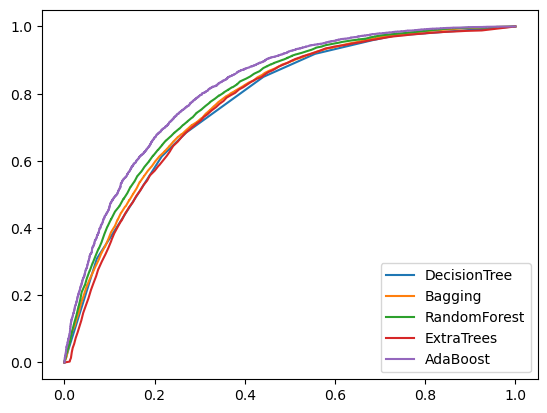

In [17]:
import matplotlib.pyplot as plt

for i, _ in enumerate(models):
    plt.plot(fprs[i],tprs[i])

plt.legend(model_titles)
plt.show()